### Importing necessary libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# data manipulation and handling libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Data preprocessing and EDA libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

#Model selection libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


#ML Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error

#Unsupervised ML library
from sklearn.cluster import KMeans


#Warning filter library
import warnings
warnings.filterwarnings('ignore')

#Multi-Collinearity Test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA




In [3]:
# loading the Datafarme

### Loading the dataset

In [4]:
df = pd.read_excel('Capstone Project.xlsx')

In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observations from df.info()
1. There are no null values
2. We have 1030 rows and 9 columns
3. Dependent variable = strength
4. All the remaining columns are independent variables

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Analysis from Descriptive Statistics

1. There may be skewness in the data in all columns
2. There might chance of outliers if we cpmpare quartile of some columns
3. Since minimum and Q1 values are same for slag and ash, so we do not have outliers in the lower whisker region.
4. The range of value 'age' is from 1 to 365, we can say that the values are in 'Days'.

In [8]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'feature_name' : col,
                'count' : my_df[col].count(),
                'quartile1' : my_df[col].quantile(.25),
                'quartile2' : my_df[col].quantile(.50),
                'quartile3' : my_df[col].quantile(.75),
                'mean' : my_df[col].mean(),
                'max' : my_df[col].max(),
                'variance' : round(my_df[col].var()),
                'standard_deviation' : my_df[col].std(),
                'skewness' : my_df[col].skew(),
                'kurtosis' : my_df[col].kurt()
            })
        result.append(stats)
    result_df = pd.DataFrame(result)
    # skewness type :
    skewness_label = []
    for i in result_df['skewness']:
        if i <= -1:
            skewness_label.append('Highly negatively skewed')
        elif -1 < i <= -0.5:
            skewness_label.append('Moderately negatively skewed')
        elif -0.5 < i < 0:
            skewness_label.append('Fairly negatively skewed')
        elif 0 <= i <= 0.5:
            skewness_label.append('Fairly Positively skewed')
        elif 0.5 <= i < 1:
            skewness_label.append('Moderately Positively skewed')
        elif i >= 1:
            skewness_label.append('Highly Positively skewed')
    result_df['skewness_comment'] = skewness_label
    
    # kurtosis type :
    kurtosis_label = []
    for i in result_df['kurtosis']:
        if i >= 1:
            kurtosis_label.append('Leptokurtic Curve')
        elif i <= -1:
            kurtosis_label.append('Platykurtic Curve')
        else:
            kurtosis_label.append('Mesokurtic Curve')
    result_df['kurtosis_comment'] = kurtosis_label
    
    # Outliers :
    outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            q1 = my_df[col].quantile(.25)
            q2 = my_df[col].quantile(.50)
            q3 = my_df[col].quantile(.75)
            iqr = q3-q1
            lower_whisker = q1-1.5*iqr
            upper_whisker = q3+1.5*iqr
            if len(my_df[(my_df[col] < lower_whisker) | (my_df[col] > upper_whisker) ]) > 0:
                outliers_label.append('Have outliers')
            else:
                outliers_label.append('No outliers')
    result_df['Outlier Comment'] = outliers_label
    return result_df

In [9]:
custom_summary(df)

,feature_name,count,quartile1,quartile2,quartile3,mean,max,variance,standard_deviation,skewness,kurtosis,skewness_comment,kurtosis_comment,Outlier Comment
0,cement,1030,192.375,272.900,350.000,281.167864,540.0,10922,104.506364,0.509481,-0.520652,Moderately Positively skewed,Mesokurtic Curve,No outliers
1,slag,1030,0.000,22.000,142.950,73.895825,359.4,7444,86.279342,0.800717,-0.508175,Moderately Positively skewed,Mesokurtic Curve,Have outliers
2,ash,1030,0.000,0.000,118.300,54.188350,200.1,4096,63.997004,0.537354,-1.328746,Moderately Positively skewed,Platykurtic Curve,No outliers
3,water,1030,164.900,185.000,192.000,181.567282,247.0,456,21.354219,0.074628,0.122082,Fairly Positively skewed,Mesokurtic Curve,Have outliers
4,superplastic,1030,0.000,6.400,10.200,6.204660,32.2,36,5.973841,0.907203,1.411269,Moderately Positively skewed,Leptokurtic Curve,Have outliers
5,coarseagg,1030,932.000,968.000,1029.400,972.918932,1145.0,6046,77.753954,-0.040220,-0.599016,Fairly negatively skewed,Mesokurtic Curve,No outliers
6,fineagg,1030,730.950,779.500,824.000,773.580485,992.6,6428,80.175980,-0.253010,-0.102177,Fairly negatively skewed,Mesokurtic Curve,Have outliers
7,age,1030,7.000,28.000,56.000,45.662136,365.0,3990,63.169912,3.269177,12.168989,Highly Positively skewed,Leptokurtic Curve,Have outliers
8,strength,1030,23.710,34.445,46.135,35.817961,82.6,279,16.705742,0.416977,-0.313725,Fairly Positively skewed,Mesokurtic Curve,Have outliers


Analysis from Custom Summary
1. Cement has a mesokurtic curve which implies the datapoints are moderate in distance from the mean, so mean and standard deviation are moderate
2. Slag has a mesokurtic curve which implies the datapoints are moderate in distance from the mean, so mean and standard deviation are moderate
3. Ash has platykurtic curve which implies that the mean does not represent the whole data and standard deviation is high
4. Water has a mesokurtic curve which implies the datapoints are moderate in distance from the mean, so mean and standard deviation are moderate 
5. Superplastic has a leptokurtic curve which implies that the datapoints are closer to the mean

### Performing outlier treatment

In [10]:
def replace_outlier(my_df, col, method = 'quartile', strategy = 'median'):
    col_data = my_df[col]
    
    if method == 'quartile': #Using quartiles to calculate IQR
        q1 = my_df[col].quantile(.25)
        q2 = my_df[col].quantile(.50)
        q3 = my_df[col].quantile(.75)
        iqr = q3-q1
        lower_whisker = q1 - 1.5*iqr
        upper_whisker = q3 + 1.5*iqr
    elif method == 'standard deviation':
        mean = col_data.mean()
        std = col_data.std()
        lower_whisker = mean - 2*std
        upper_whisker = mean + 2*std
    else:
        print('Pass a correct method')
        
        
    #Printing all the outliers
    
    outliers = my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker)]
    outlier_density = round(len(outliers)/len(my_df),2) * 100 #Checking the percentage record of outliers
    if len(outliers) == 0: #Does not have outliers
        print(f'Feature {col} does not have outliers')
        print('\n')
    else:
        print((f'Feature {col} has outliers'))
        print('\n')
        print(f'Total no. of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'outlier percentage in {col} is {outlier_density}%')
        print('\n')
        display(my_df[(col_data < lower_whisker) | (col_data > upper_whisker)]) 
        
    #Replacing outliers
    if strategy == 'median':
        my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker), col] = q2
    elif strategy == 'mean':
        my_df.loc[(col_data < lower_whisker) | (col_data > upper_whisker), col] = mean
    else:
        print('Pass a correct strategy')
    return my_df            

In [11]:
replace_outlier(df,'slag')

Feature slag has outliers


Total no. of outliers in slag are 2


outlier percentage in slag is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


## ODT (Outlier Dectection Technique) Plots:
1. Descriptive plots
2. Histogram with outliers
3. histogram without outliers

In [12]:
def odt_plots(my_df,col):
    f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8))
    
    
    #Descriptive statistics box plot
    sns.boxplot(my_df[col], ax = ax1)
    ax1.set_title(col + ' box plot')
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Box plot")
    
    #plotting histogram with outliers
    sns.distplot(my_df[col], ax = ax2, fit = sci.norm)#histplot and distplot give the same output.sci.norm - on histogram we are fitting normal distribution plot
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(), color = 'brown')
    ax2.set_title(col + ' histogram with outliers')
    ax2.set_xlabel("Values")
    ax2.set_ylabel("Density")
    
    #Replacing Outliers
    df_out = replace_outlier(my_df, col)
    
    #plotting histogram without outliers
    sns.distplot(my_df[col], ax = ax3, fit = sci.norm)#histplot and distplot give the same output.sci.norm - on histogram we are fitting normal distribution plot
    ax3.axvline(my_df[col].mean(), color = 'green')
    ax3.axvline(my_df[col].median(), color = 'brown')
    ax3.set_title(col + ' histogram without outliers')
    ax3.set_xlabel("Values")
    ax3.set_ylabel("Density")
    
    plt.show()
    
      
    

Feature cement does not have outliers




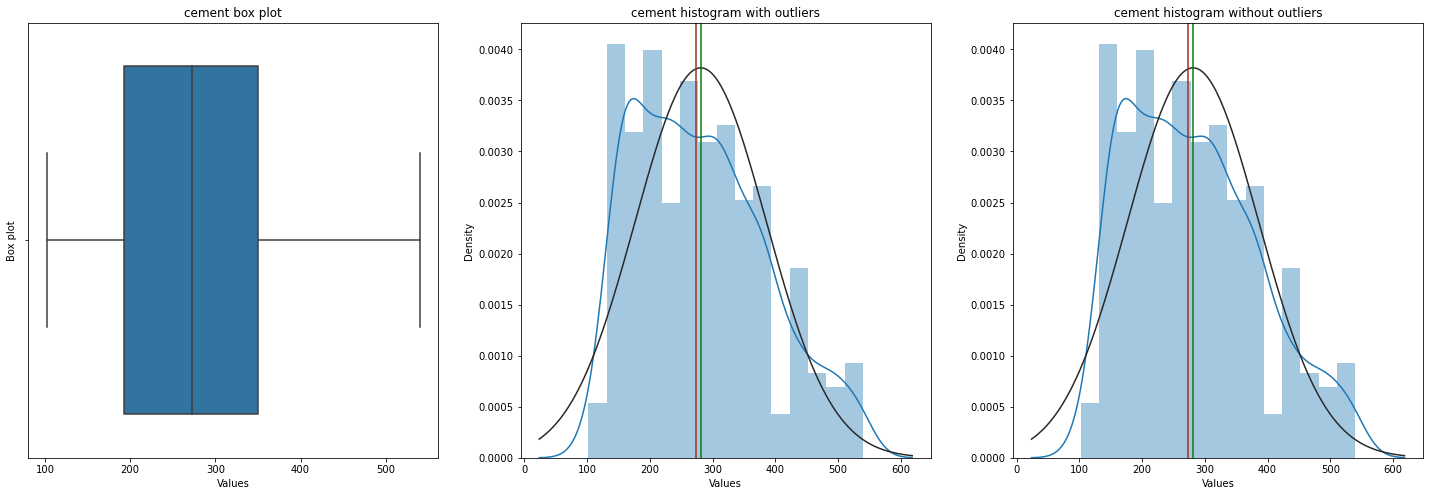

Feature slag does not have outliers




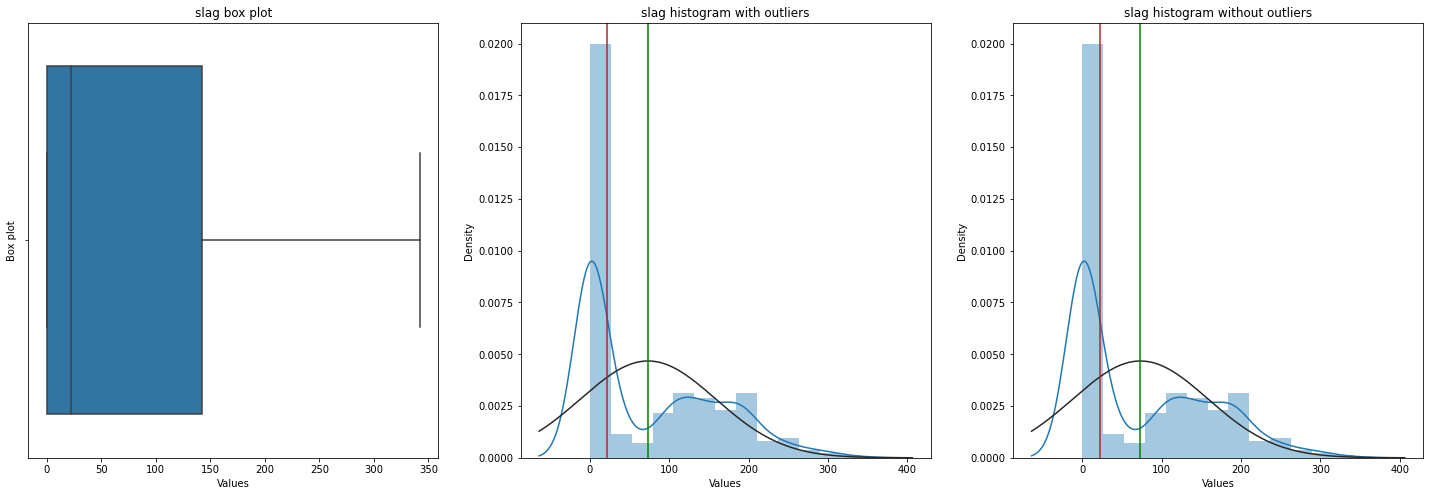

Feature ash does not have outliers




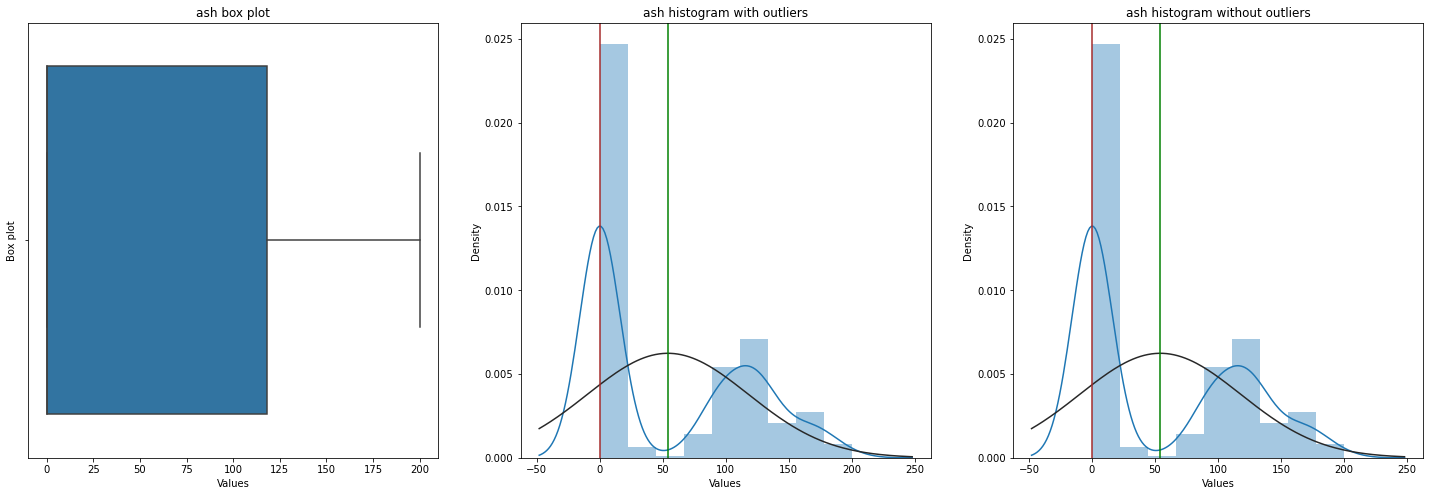

Feature water has outliers


Total no. of outliers in water are 9


outlier percentage in water is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


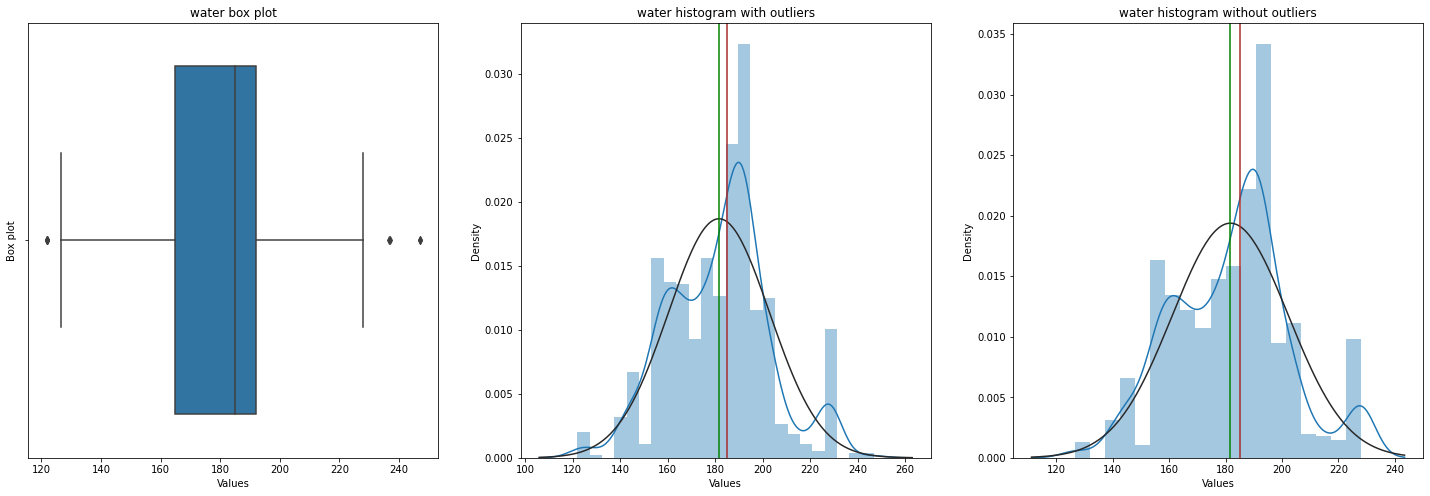

Feature superplastic has outliers


Total no. of outliers in superplastic are 10


outlier percentage in superplastic is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


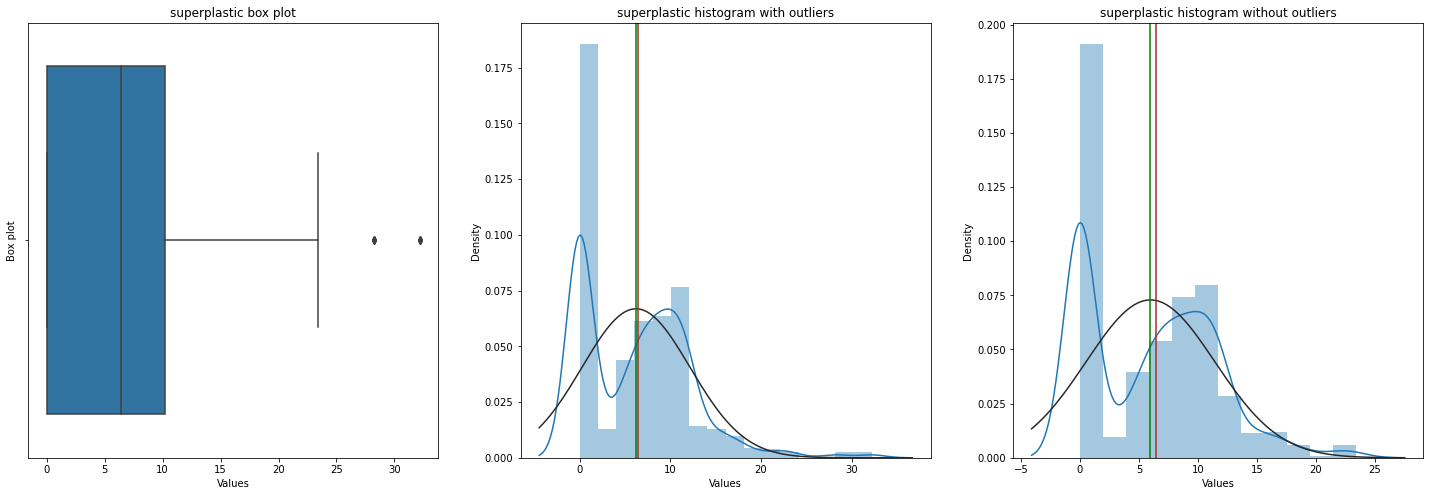

Feature coarseagg does not have outliers




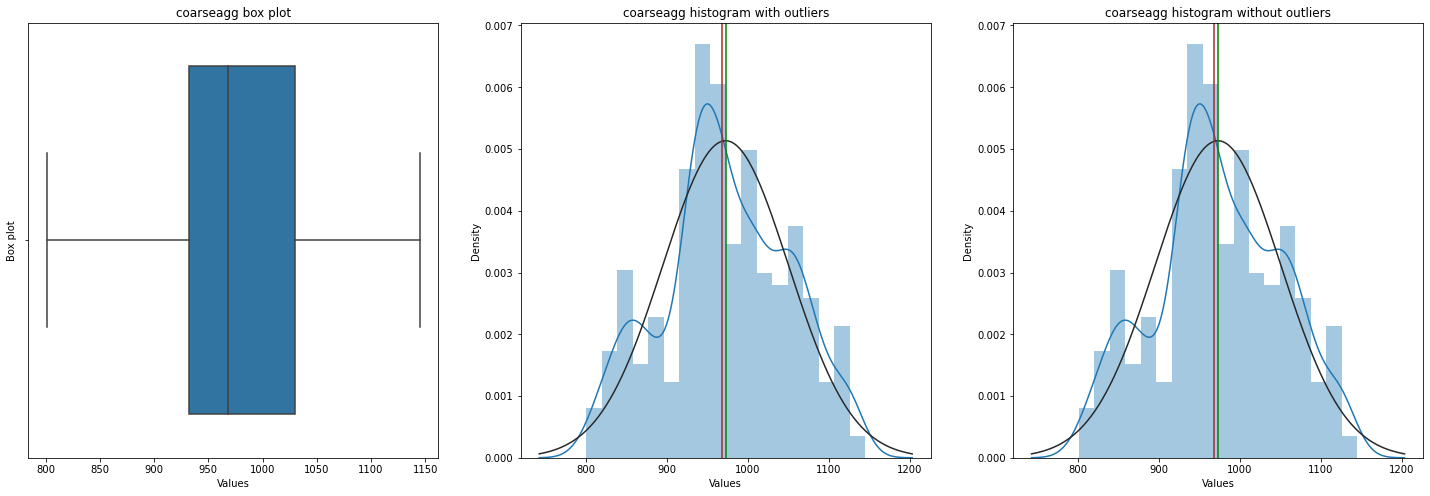

Feature fineagg has outliers


Total no. of outliers in fineagg are 5


outlier percentage in fineagg is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


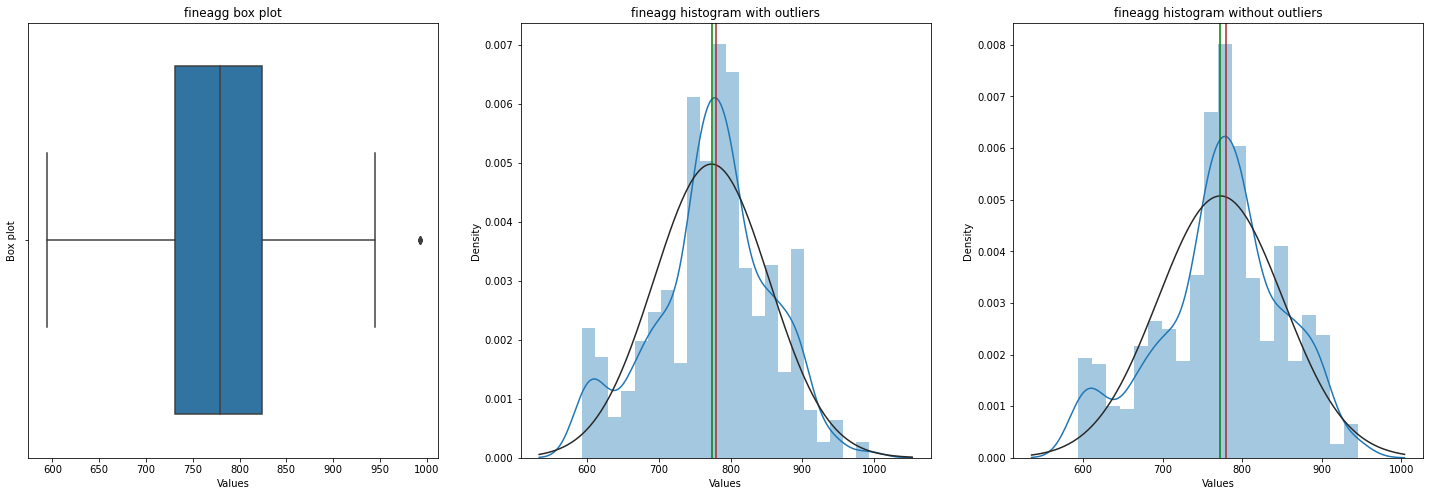

Feature age has outliers


Total no. of outliers in age are 59


outlier percentage in age is 6.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


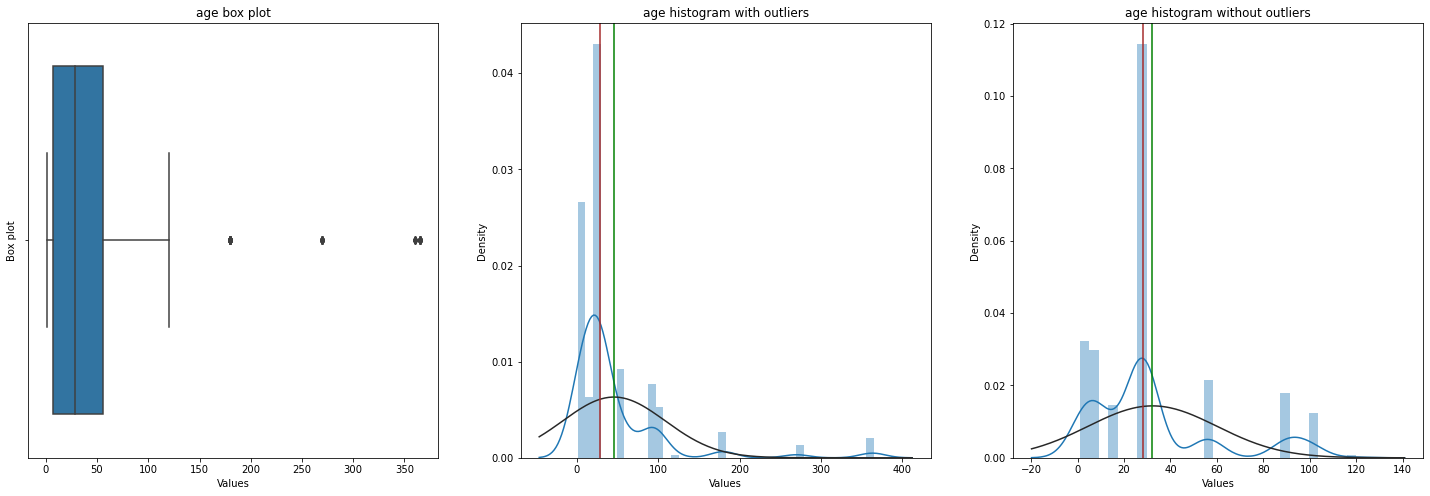

Feature strength has outliers


Total no. of outliers in strength are 4


outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


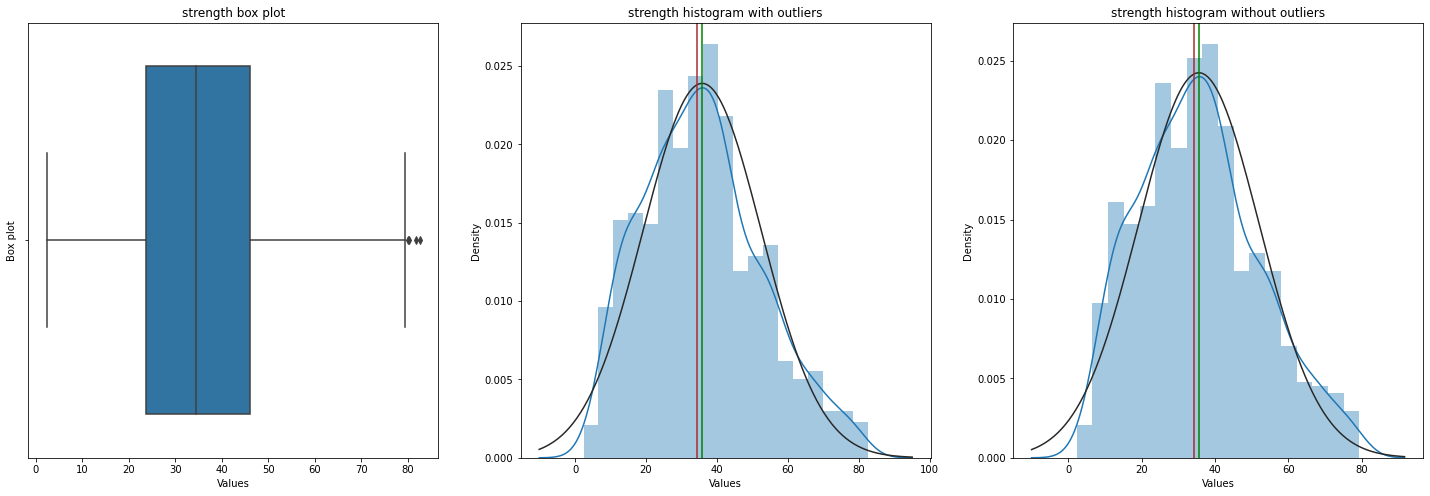

In [13]:
for col in df.columns:
    odt_plots(df, col)

### Multivariate Analysis using Regression

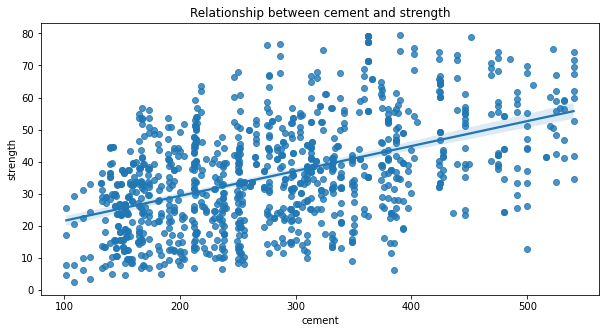

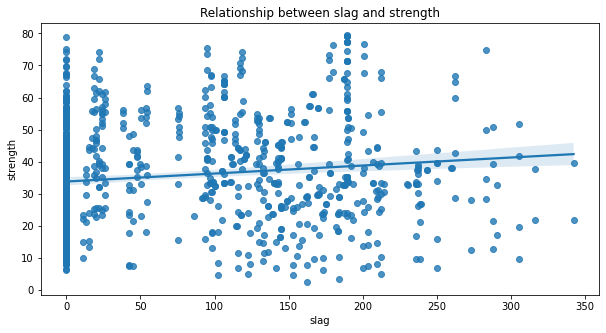

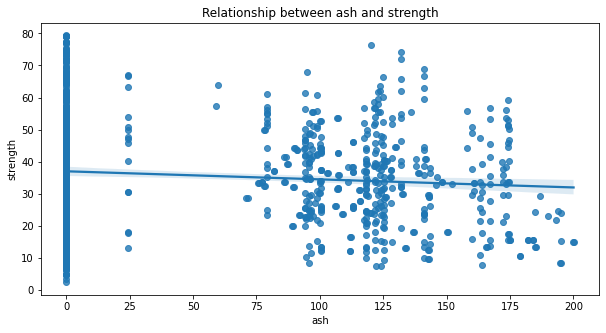

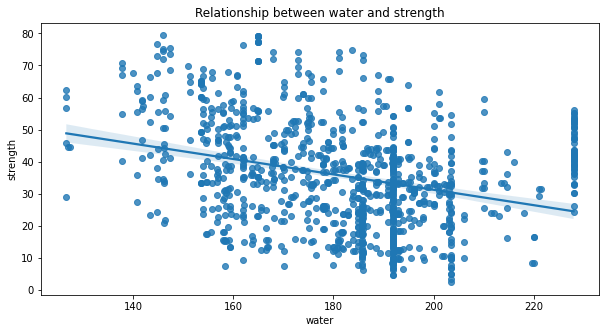

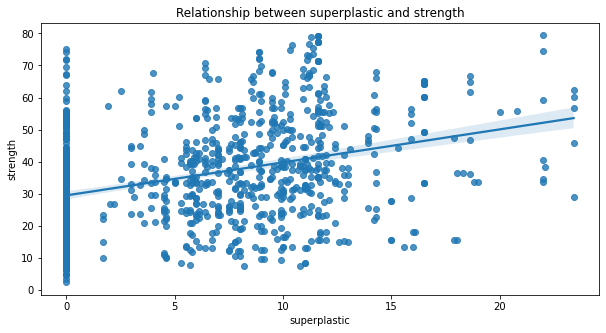

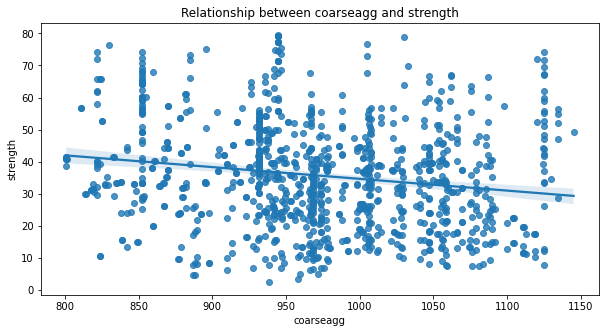

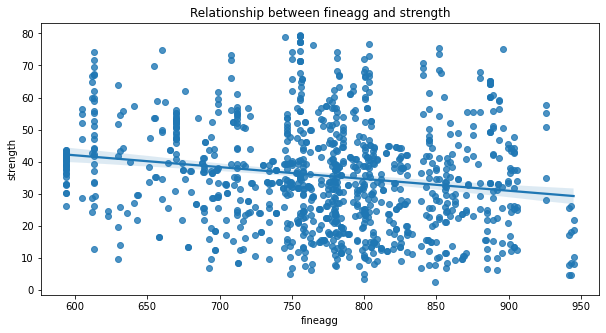

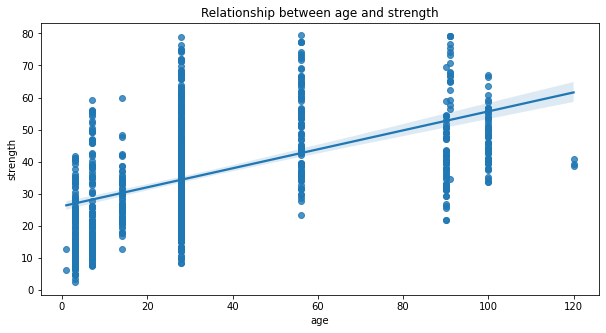

In [14]:
for col in df.columns:
    if col != 'strength':
        fig, ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col], y = df['strength'], ax = ax1).set_title(f'Relationship between {col} and strength')

Analysis from Regression plots
1. Strength and cement are highly positively correlated
2. Strength and slag are slightly positively correlated
3. Strength and ash are slightly negatively correlated
4. Strength and water are highly negatively correlated
5. Strength and superplastic are highly positively correlated
6. Strength and coarseagg are highly negatively correlated
7. Strength and fineagg are slightly negatively correlated
8. Strength and age are highly positively correlated

### Multi collinearity test
1. Correlation matrix/ heat map(Stage 1)

<AxesSubplot:>

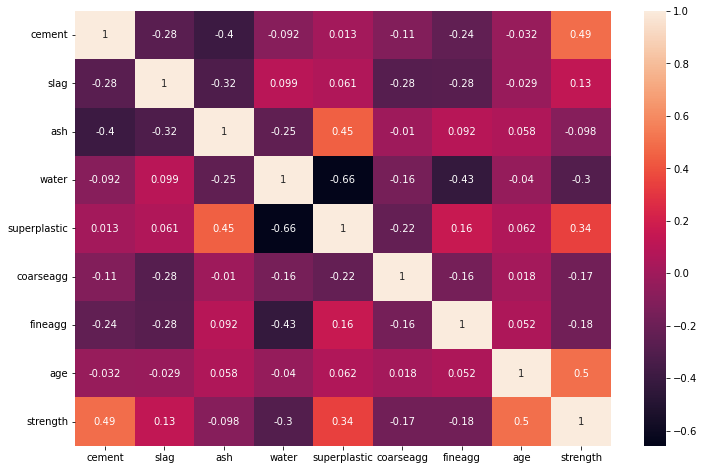

In [15]:
corr = df.corr()
df.ax = plt.subplots(figsize = (12,8))
sns.heatmap(corr, annot = True)

Analysis from Stage 1 test
1. Slag has high correlation with ash
2. Ash has high correlation with superplastic
3. fineagg has high correlation with water
4. Strength has high correlation with age

## Multi collinearity test
1. Variance Inflation Factor(VIF)

### Correlation with target feature

In [16]:
 def correlation_with_target(data, t_col):
        independent_variable = data.drop(t_col, axis = 1).columns
        corr_result = []
        for col in independent_variable:
            corr_result.append(data[t_col].corr(data[col]))
        result = pd.DataFrame([independent_variable, corr_result], index = ['Independent variables', 'Correlation']).T
        return result.sort_values('Correlation', ascending = False)

In [17]:
correlation_with_target(df, 'strength')

,Independent variables,Correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.097973
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


Analysis of correlation b/w dependent and independent
1. age and cement have 49% correlation with strength 
2. superplastic and water have 34% and 30% correlation 

### Applying PCA to treat multicollinearity

In [18]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
#Applying StandardScaler for feature scaling(feature scaling technique)
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    for i in range (1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_) #evr is the cumulative sum
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained variance ratio after PCA is : ', evr)
    #Creating a dataframe of principal components
    col = []
    for j in range(1, pcs+1):
        col.append('PC_' + str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df

In [19]:
pca_df = custom_PCA(df.drop('strength', axis = 1))                                               

Explained variance ratio after PCA is :  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [20]:
#On fetching 1st component we get an idea of 35% of the dataset
#On fetching 2nd component we get an idea of 62% of the dataset
#On fetching 3rd component we get an idea of 82% of the dataset
#On fetching 4th component we get an idea of 94% of the dataset (Without scaling) 
# we retain 97.2% of the data after feature scaling (Standard Scaler)

In [21]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Joining PCA features with target features

In [22]:
pca_df = pca_df.join(df['strength'], how = 'left') #left join

In [23]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC_1      1030 non-null   float64
 1   PC_2      1030 non-null   float64
 2   PC_3      1030 non-null   float64
 3   PC_4      1030 non-null   float64
 4   PC_5      1030 non-null   float64
 5   PC_6      1030 non-null   float64
 6   strength  1030 non-null   float64
dtypes: float64(7)
memory usage: 56.5 KB


In [24]:
pca_df.head() #Joining of target variable with our dataset(pca_df)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29


### Model building
Stages of model building
1. Custom train_test_split function
2. Cross validation
3. Hyperparameter tuning

In [25]:
def train_and_test_split(data, tcol, testsize = 0.3, randomstate = 100 ):  #tcol is the target column
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testsize, random_state = randomstate)

In [26]:
def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data, t_col)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name, rmse, r2]
    return result

In [27]:
model_builder(model_name = 'LinearRegression',model = LinearRegression(),data = pca_df,t_col = 'strength')

['LinearRegression', 9.510886873673916, 0.6519519960039926]

In [28]:
#Model name, rmse, r2 score

In [29]:
def multiple_models(data,t_col):
    col_names = ['Model_Name','RMSE','R2 Score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('LinearRegression',LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder('LassoRegression',Lasso(),data,t_col)
    result.loc[len(result)] = model_builder('RidgeRegression',Ridge(),data,t_col)
    result.loc[len(result)] = model_builder('DTR',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Random Forest Regressor',RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Ada Boost Regressor',AdaBoostRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boosting Regressor',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('xgboost',XGBRegressor(),data,t_col)
    return result.sort_values('R2 Score',ascending = False)
    


In [30]:
multiple_models(pca_df,'strength')

,Model_Name,RMSE,R2 Score
9,xgboost,6.613111,0.831729
6,Random Forest Regressor,6.687638,0.827915
8,Gradient Boosting Regressor,7.094812,0.806323
5,KNN,8.032300,0.751757
7,Ada Boost Regressor,8.343002,0.732181
3,DTR,8.897744,0.695381
4,SVR,9.107654,0.680839
1,LassoRegression,9.426183,0.658124
2,RidgeRegression,9.508918,0.652096
0,LinearRegression,9.510887,0.651952


In [31]:
def k_fold_cv(X,y,fold=10):
    score_lr = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_ls = cross_val_score(Lasso(),X,y,cv=fold)
    score_rd = cross_val_score(Ridge(),X,y,cv=fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(),X,y,cv=fold)
    score_svr = cross_val_score(SVR(),X,y,cv=fold)
    score_knn = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_ab = cross_val_score(AdaBoostRegressor(),X,y,cv=fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),X,y,cv=fold)
    score_xb = cross_val_score(XGBRegressor(),X,y,cv=fold)
    
    model_name = ['LinearRegression','Lasso','Ridge','DTR','SVR','KNN','Random Forest Regressor',
                 'Ada Boost Regressor','Gradient Boosting Regressor','xgboost']
    scores = [score_lr,score_ls,score_rd,score_dtr,score_svr,score_knn,
              score_rf,score_ab,score_gb, score_xb ]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        tem = [m_name,score_mean,score_std] 
        result.append(tem)
    k_fold_df = pd.DataFrame(result,columns = ['Model_Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)

        

In [32]:
k_fold_cv(pca_df.drop('strength',axis = 1),pca_df['strength'])

,Model_Name,CV Accuracy,CV STD
9,xgboost,0.873262,0.036061
6,Random Forest Regressor,0.867369,0.032113
8,Gradient Boosting Regressor,0.829492,0.050410
3,DTR,0.773598,0.070121
5,KNN,0.768367,0.056073
7,Ada Boost Regressor,0.731356,0.033692
4,SVR,0.703117,0.042765
2,Ridge,0.663935,0.059437
0,LinearRegression,0.663928,0.059476
1,Lasso,0.649837,0.049887


### Hyperparameter Tuning

In [33]:
def tuning(X,y,fold = 10):
    param_LAS = {'alpha': [1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_KNN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70]}
    param_DTR = {'max_depth':[3,5,7,9,10,12,14,16],'max_features':['auto','sqrt','log2','sqrt',2,3,4,5,6]}
    param_SVR = {'gamma':['scale','auto'],'C':[0.5,1]}
    param_ADB = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_XGB = {'eta':[0.1,0.2,0.3,0.4,0.5],'max_depth':[3,5,7,9,10,12,14,16],'gamma':[0,10,20,30,40,50,60,70,80,90,100,200,300,400,500],'reg_lambda':[0,1]}
    param_RF = {'max_depth':[3,5,7,9,10,12,14,16],'max_features':['auto','sqrt','log2','sqrt',2,3,4,5,6]}
    
    
    
    
# Hyperparameter tuning
    
    tune_LAS = GridSearchCV(Lasso(),param_LAS,cv=fold)
    tune_RID = GridSearchCV(Ridge(),param_LAS,cv=fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor(),param_KNN,cv=fold)
    tune_DTR = GridSearchCV(DecisionTreeRegressor(),param_DTR,cv=fold)
    tune_SVR = GridSearchCV(SVR(),param_SVR,cv=fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor(),param_ADB,cv=fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor(),param_GB,cv=fold)
    tune_XGB = GridSearchCV(XGBRegressor(),param_XGB,cv=fold)
    tune_RF = GridSearchCV(RandomForestRegressor(),param_RF,cv=fold)
    
    
# Fitting x and y variables
    tune_LAS.fit(X,y)
    tune_RID.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DTR.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)
    
    
    tune = [tune_LAS,tune_RID,tune_KNN,tune_DTR,tune_SVR,tune_ADB,tune_GB,tune_XGB,tune_RF]
    models = ['Lasso','Ridge','DTR','SVR','KNN','Random Forest Regressor',
                 'Ada Boost Regressor','Gradient Boosting Regressor','xgboost']
    
    
    for i in range(len(tune)):
        print('models',models[i])
        print('Best parameters :',tune[i].best_params_) 
    

In [34]:
tuning(pca_df.drop('strength',axis = 1),pca_df['strength'])

### Cross validation post Hyperparameter Tuning

In [35]:
def cv_post_hpt(X,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_ls = cross_val_score(Lasso(alpha = 0.1),X,y,cv=fold)
    score_rd = cross_val_score(Ridge(alpha = 6),X,y,cv=fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(max_depth =12),X,y,cv=fold)
    score_svr = cross_val_score(SVR(C=1),X,y,cv=fold)
    score_knn = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_ab = cross_val_score(AdaBoostRegressor(learning_rate = 0.6),X,y,cv=fold)
    score_gb = cross_val_score(GradientBoostingRegressor(alpha = 0.9),X,y,cv=fold)
    score_xb = cross_val_score(XGBRegressor(eta = 0.2),X,y,cv=fold)
    
    
    model_name = ['LinearRegression','Lasso','Ridge','DTR','SVR','KNN','Random Forest Regressor',
                 'Ada Boost Regressor','Gradient Boosting Regressor','xgboost']
    scores = [score_lr,score_ls,score_rd,score_dtr,score_svr,score_knn,
              score_rf,score_ab,score_gb, score_xb]
    result = []
    
    
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns = ['Model_Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values('CV Accuracy',ascending = False)
    
        

In [36]:
cv_post_hpt(pca_df.drop('strength',axis = 1),pca_df['strength'])

,Model_Name,CV Accuracy,CV STD
9,xgboost,0.872393,0.035963
6,Random Forest Regressor,0.867114,0.032849
8,Gradient Boosting Regressor,0.828689,0.050253
5,KNN,0.768367,0.056073
3,DTR,0.765700,0.053681
7,Ada Boost Regressor,0.726099,0.041712
4,SVR,0.703117,0.042765
1,Lasso,0.664143,0.058426
2,Ridge,0.663951,0.059242
0,LinearRegression,0.663928,0.059476


### Clustering

- Using K-Means Clustering to check if accuracy can be improved any further

<AxesSubplot:xlabel='cement', ylabel='strength'>

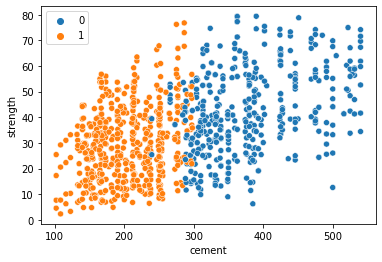

In [37]:
kmeans = KMeans(n_clusters = 2,random_state = 3)
clusters = kmeans.fit_predict(df.drop('strength',axis = 1))
sns.scatterplot(x = df['cement'], y = df['strength'], hue = clusters)


In [38]:
def clustering(X, t_col, clusters):
    column = list(set(list(X.columns)) - set(X['strength']))
    r = int(len(column)/2)
    if r % 2 == 0:
        r = r
    else:
        r+= 1
    f,ax = plt.subplots(r,2,figsize = (15,15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a != len(column):
                ax[row][col].scatter(X[t_col], X[column[a]], c = clusters)
                ax[row][col].set_xlabel(t_col)
                ax[row][col].set_ylabel(column[a])
                a += 1
                
                

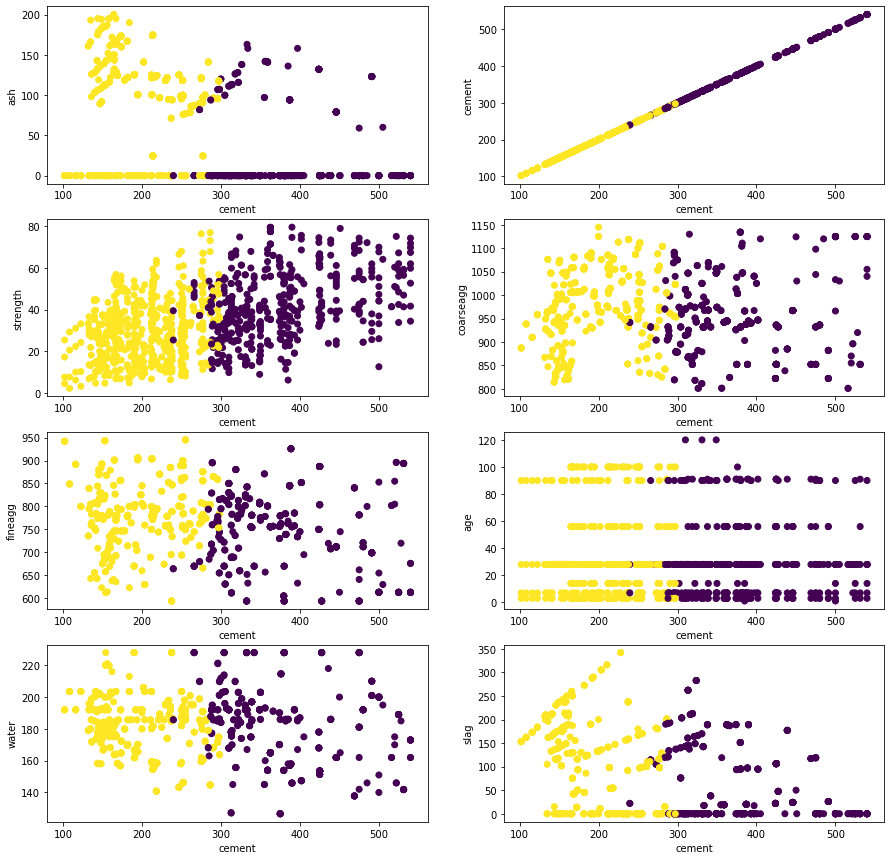

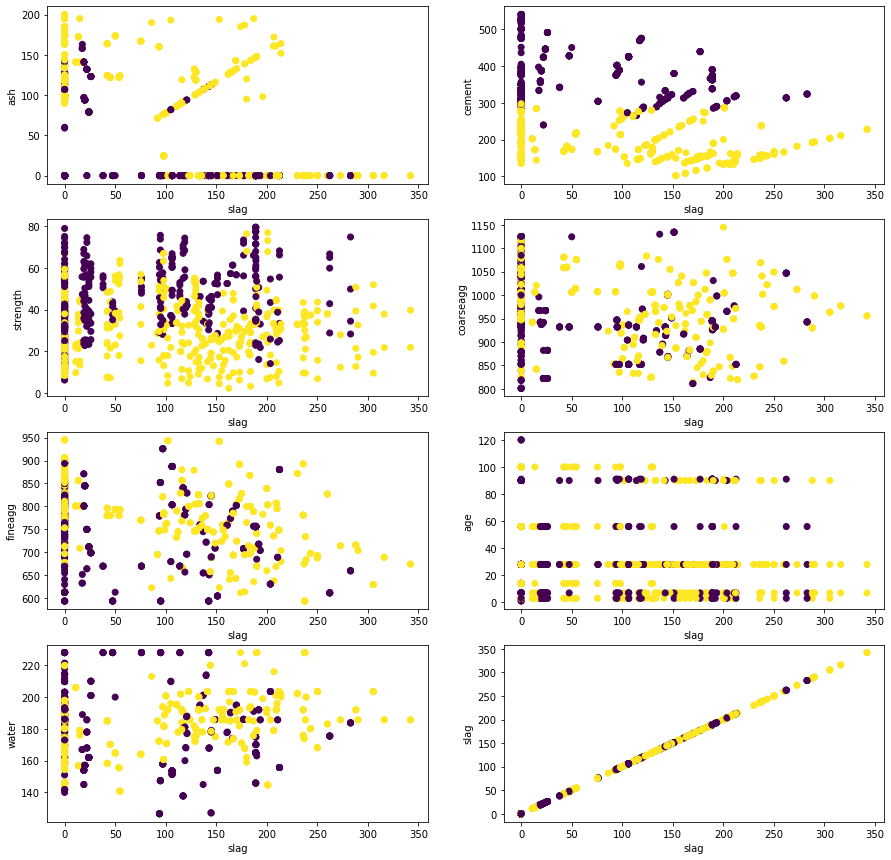

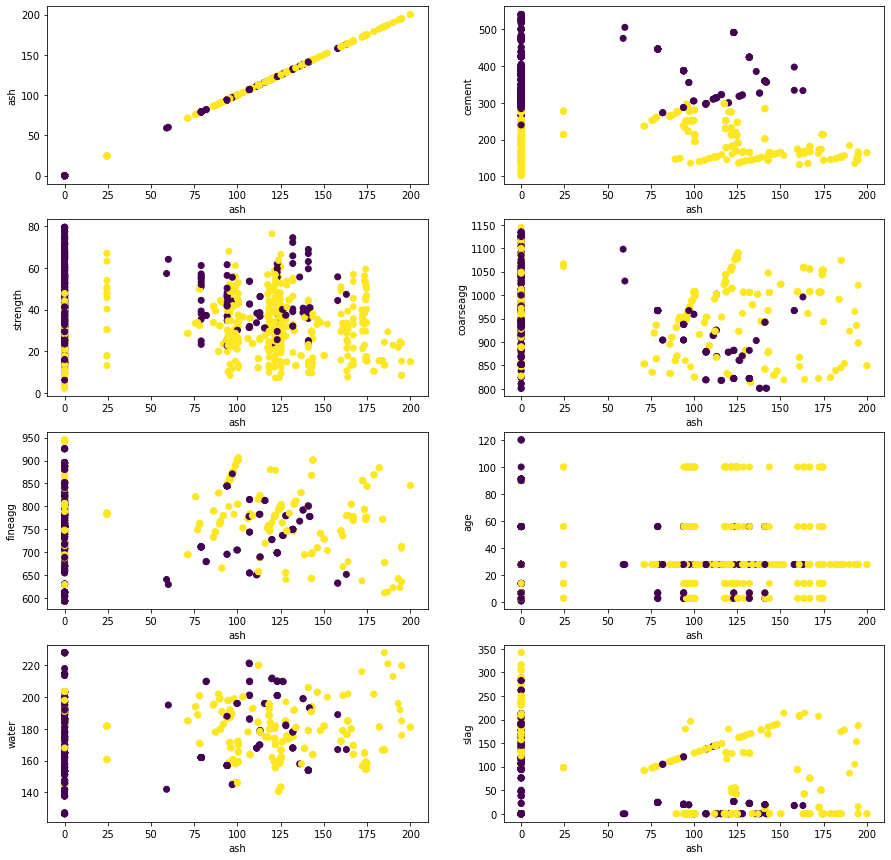

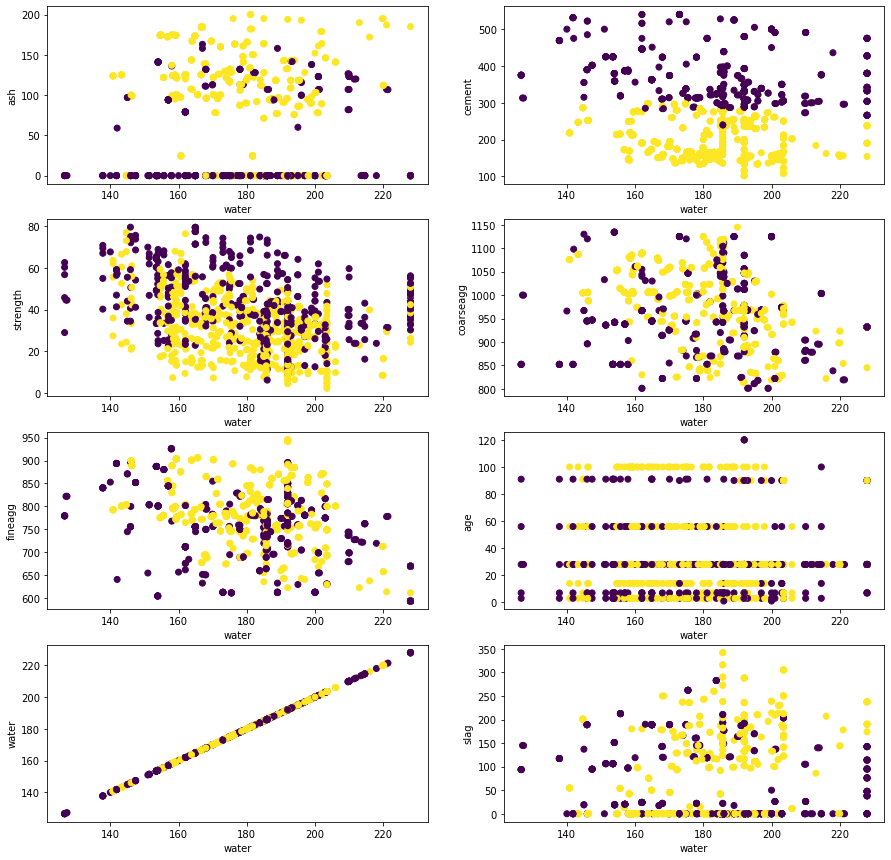

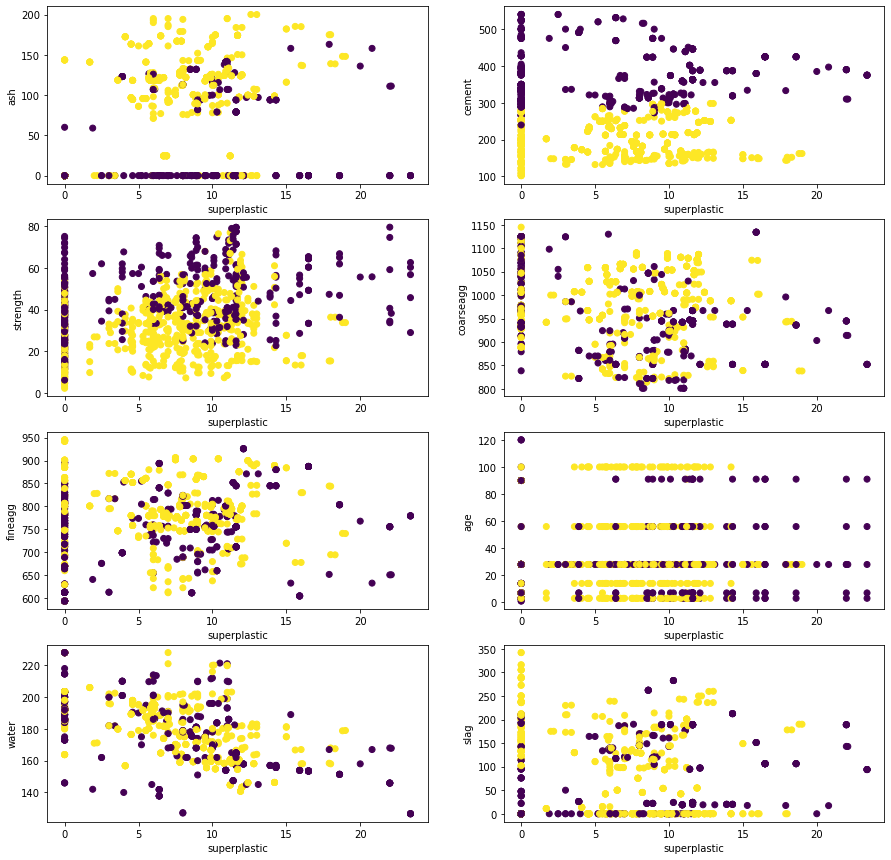

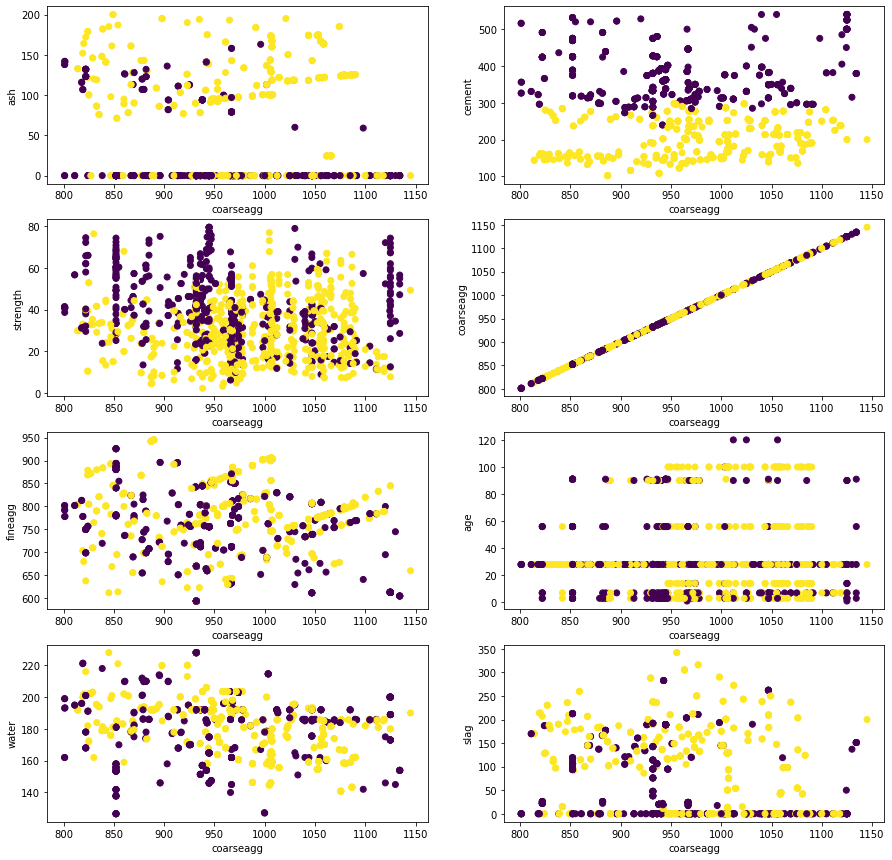

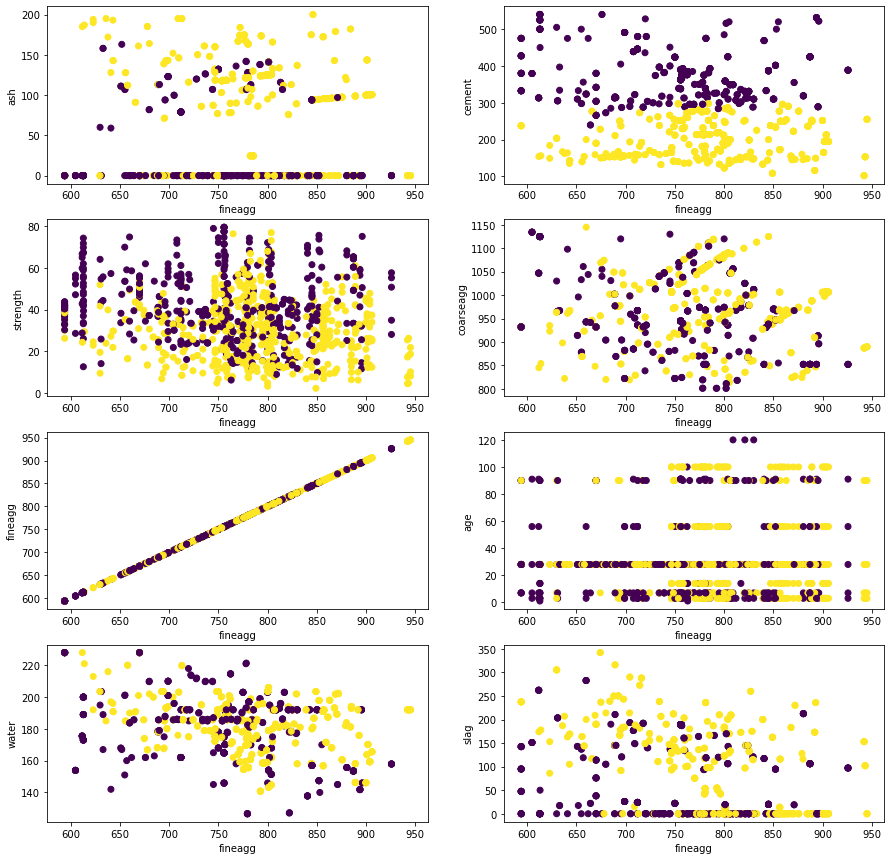

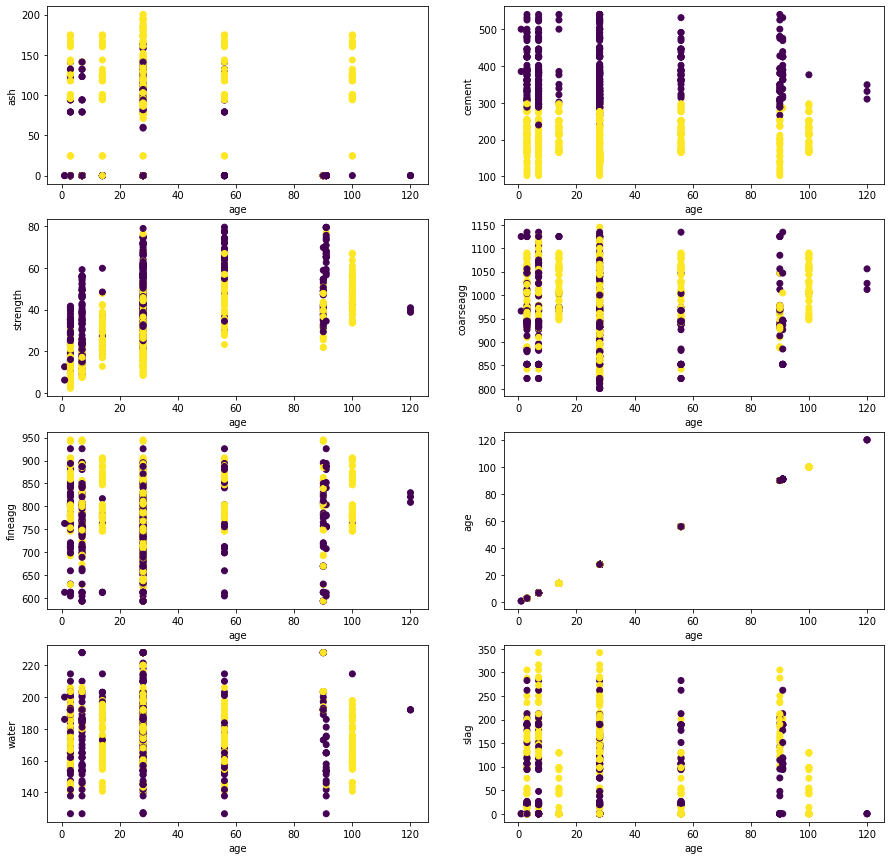

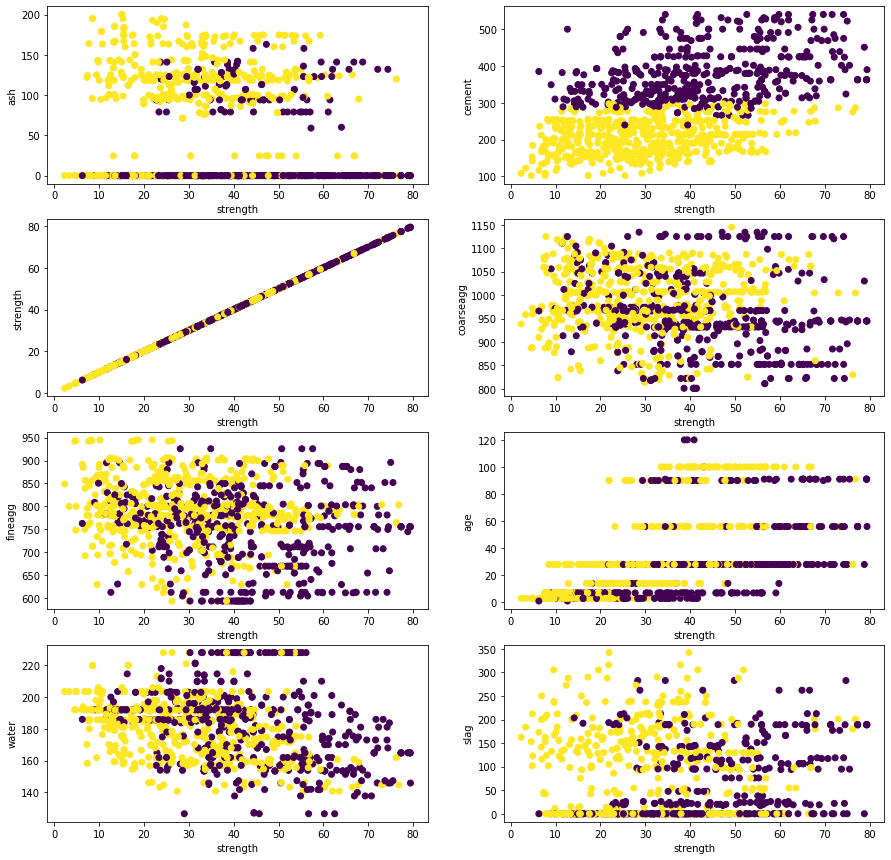

In [39]:
X = df.drop('strength', axis = 1)
for col in df.columns:
    clustering(df,col,clusters)

Analysis:
- Cement is forming clusters with all other independent variables

In [40]:
new_df = df.join(pd.DataFrame(clusters, columns = ['clusters']), how = 'left')
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


In [41]:
new_df['clusters'].value_counts()

1    567
0    463
Name: clusters, dtype: int64

In [42]:
clusters_agg = new_df.groupby('clusters')['cement'].agg(['mean','median'])

In [43]:
clusters_agg

,mean,median
clusters,,
0,376.731317,362.6
1,203.132804,202.0


In [44]:
clusters_df = new_df.merge(clusters_agg, on = 'clusters',how = 'left')

In [45]:
clusters_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,203.132804,202.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,203.132804,202.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1,203.132804,202.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0,376.731317,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,203.132804,202.0


In [46]:
multiple_models(clusters_df.drop('clusters', axis = 1), 'strength')

,Model_Name,RMSE,R2 Score
9,xgboost,5.546408,0.881636
6,Random Forest Regressor,6.015332,0.860775
8,Gradient Boosting Regressor,6.131000,0.855370
3,DTR,7.199825,0.800547
7,Ada Boost Regressor,7.982816,0.754806
1,LassoRegression,9.229025,0.672276
2,RidgeRegression,9.251133,0.670704
0,LinearRegression,9.251142,0.670703
5,KNN,9.916579,0.621626
4,SVR,14.199101,0.224255


In [47]:
x = clusters_df.drop(['strength','clusters'],axis = 1)
y = clusters_df['strength']
k_fold_cv(X,y)

,Model_Name,CV Accuracy,CV STD
9,xgboost,0.902312,0.041982
6,Random Forest Regressor,0.888134,0.034171
8,Gradient Boosting Regressor,0.877367,0.044842
3,DTR,0.827343,0.052034
7,Ada Boost Regressor,0.740442,0.037121
2,Ridge,0.686929,0.062431
0,LinearRegression,0.686929,0.062430
1,Lasso,0.686684,0.062488
5,KNN,0.667730,0.085927
4,SVR,0.233500,0.038865


In [48]:
cv_post_hpt(X,y)

,Model_Name,CV Accuracy,CV STD
9,xgboost,0.904047,0.040738
6,Random Forest Regressor,0.887143,0.034032
8,Gradient Boosting Regressor,0.877742,0.044826
3,DTR,0.820719,0.053671
7,Ada Boost Regressor,0.736701,0.037403
2,Ridge,0.686930,0.062431
0,LinearRegression,0.686929,0.062430
1,Lasso,0.686926,0.062433
5,KNN,0.667730,0.085927
4,SVR,0.233500,0.038865


### Understanding feature importance using XGBoost

In [49]:
x_train, x_test, y_train, y_test = train_and_test_split(clusters_df.drop(['clusters'], axis = 1), 'strength')

In [50]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

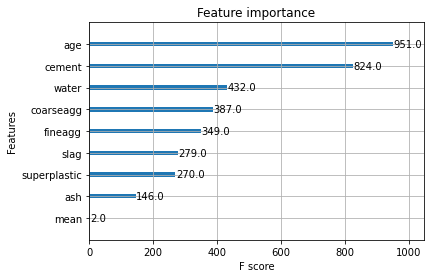

In [51]:
xgboost.plot_importance(xgb)

Analysis on XGBost Feature importance:
1) Age and Cement are the two most important for predicting strength of the mixture

In [52]:
imp_features = clusters_df[['age','cement','water','coarseagg','fineagg','strength']] #To save our system memory we are using 
                                                                                      #five important features

In [53]:
cv_post_hpt(imp_features.drop('strength',axis = 1), imp_features['strength'])

,Model_Name,CV Accuracy,CV STD
9,xgboost,0.884666,0.044019
6,Random Forest Regressor,0.864616,0.035768
8,Gradient Boosting Regressor,0.841716,0.040675
3,DTR,0.793875,0.075990
7,Ada Boost Regressor,0.699613,0.041107
1,Lasso,0.657583,0.060431
2,Ridge,0.657579,0.060465
0,LinearRegression,0.657579,0.060465
5,KNN,0.645117,0.078104
4,SVR,0.252828,0.044987


### Building Learning Curve Analysis

In [54]:
from sklearn.model_selection import learning_curve

In [62]:
def generate_learning_curve(model_name, estimator, X, y):
    train_size , train_score, test_score = learning_curve(estimator = estimator, X = X, y=y, cv = 10)
    train_score_mean = np.mean(train_score, axis = 1)
    test_score_mean = np.mean(test_score, axis = 1)
    plt.plot(train_size, train_score_mean, c = 'blue')
    plt.plot(train_size, test_score_mean, c= 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('Learning Curve for '+ model_name)
    plt.legend(('Training R2 Score', 'Testing R2 Score'))

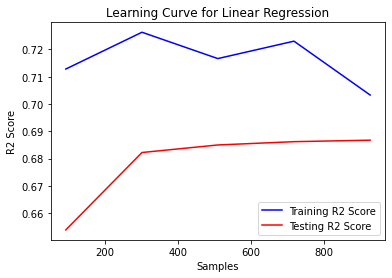

In [63]:
#useful for many purposes including comparing different algorithms,choosing model parameters during design
#R2 score gives an idea of performance of a model
generate_learning_curve('Linear Regression', LinearRegression(),clusters_df.drop(['strength','clusters'],axis = 1),clusters_df['strength']) 


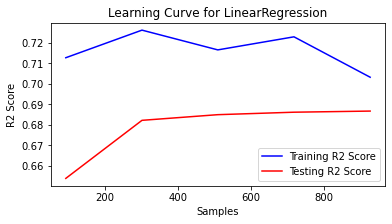

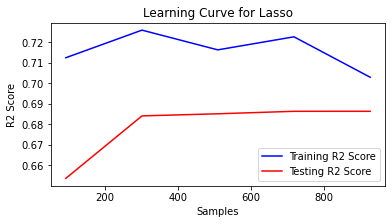

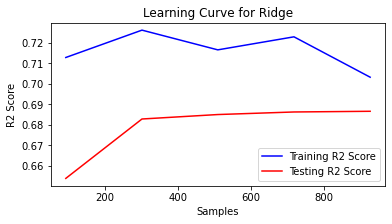

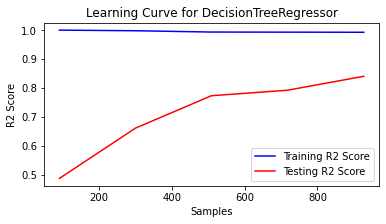

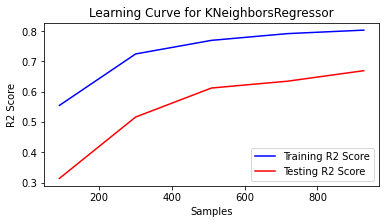

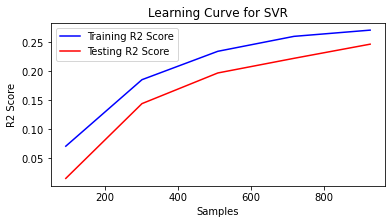

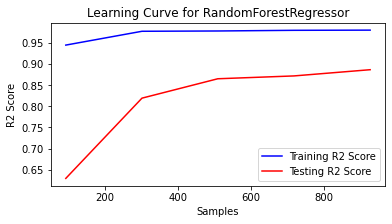

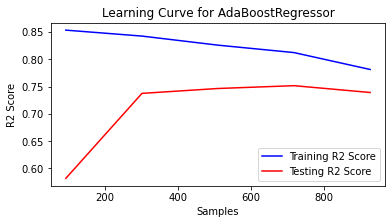

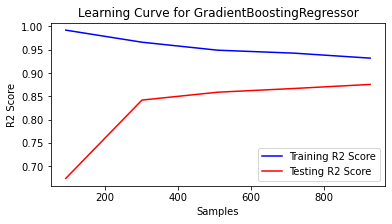

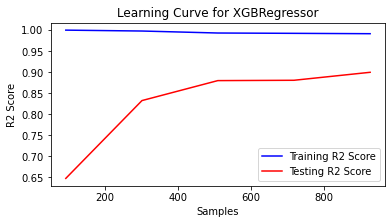

In [64]:
models = [ LinearRegression() , Lasso(), Ridge(), DecisionTreeRegressor(), KNeighborsRegressor(), 
          SVR(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
         XGBRegressor()]
for a, model in enumerate(models):
    fg = plt.figure(figsize = (6,3))
    ax = fig.add_subplot(10, 1, a+1)
    generate_learning_curve(type(models[a]).__name__, model, clusters_df.drop(['strength','clusters'],axis = 1),clusters_df['strength'] )